Text(0, 0.5, 'Error Theta')

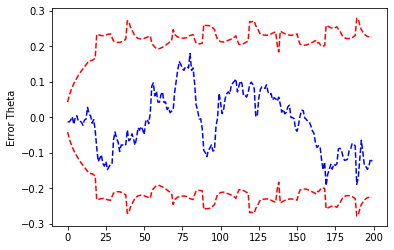

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, array, dot, stats
import math

def CovErr(Cov=array([[1,0],[0,2]]), k=3, N=100):
    A = linalg.cholesky(Cov,lower=True)
    alpha = np.linspace(0, 2*math.pi, N)
    x = np.zeros((N,2))
    y = np.zeros((N,2))
    for i in range(N):
        x[i,0] = k*math.cos(alpha[i])
        x[i,1] = k*math.sin(alpha[i])
        y[i,:] = dot(A, x[i,:])
    return np.array([np.amax(y[:,0]), np.amax(y[:,1])])
        
Input = np.load('out/input_data.npy')
Output = np.load('out/output_data.npy')
steps = Input ['num_steps']
time = np.arange(steps)
    
xReal = Input["real_robot_path"][:, 0]
yReal = Input["real_robot_path"][:, 1]
thetaReal = Input["real_robot_path"][:, 2]
    
xEstim = Output['mean_trajectory'][:, 0]
yEstim = Output['mean_trajectory'][:, 1]
thetaEstim = Output['mean_trajectory'][:, 2]
Cov = Output['covariance_trajectory']

dX = xReal - xEstim
dY = yReal - yEstim
dTheta = thetaReal - thetaEstim


N = len(xReal)
Err = np.zeros((N,3))
for i in range(N):
    xy = CovErr(Cov[:2,:2,i])
    th = CovErr(Cov[1:,1:,i])
    Err[i,0] = xy[0]
    Err[i,1] = xy[1]
    Err[i,2] = th[1]

#plt.plot(time, dX, 'b--', time, Err[:,0], 'r--', time, -Err[:,0], 'r--')
#plt.ylabel('Error X')

#plt.plot(time, dY, 'b--', time, Err[:,1], 'r--', time, -Err[:,1], 'r--')
#plt.ylabel('Error Y')

plt.plot(time, dTheta, 'b--', time, Err[:,2], 'r--', time, -Err[:,2], 'r--')
plt.ylabel('Error Theta')